# Introduction

This series of notebooks describes the `sxs` python package, which provides an interface to the data produced by the Simulating eXtreme Spacetimes collaboration.  All that data is hosted on [Zenodo](https://zenodo.org/communities/sxs) and [CaltechDATA](https://data.caltech.edu/).  Each simulation gets its own DOI and its own web page — like [this one](https://doi.org/10.5281/zenodo.1213436), for example.  But you want an easier way to get the data than clicking on links.  This package will do that for you.

The documentation is [here](https://sxs.readthedocs.io/en/main/).  The github page is [here](https://github.com/sxs-collaboration/sxs/).  Please feel free to open issues to report problems, or pull requests to fix them.

# Pythonic Preliminaries

* ***Don't*** use your system python.  Installing packages to it might screw up how your OS works.
* ***Don't*** use `sudo` when doing anything involving python.
* ***Do*** use an environment manager:
  * [Anaconda](https://www.anaconda.com/products/individual) is best for scientific python
  * [Virtualenv](https://virtualenv.pypa.io/en/latest/) is slightly simpler, but much less capable
  * [Pip](https://pip.pypa.io/en/stable/) is a useful tool, but is not an environment manager; don't rely on it alone
  * Pipenv is only suitable for web development, not scientific python; don't use this at all

The `sxs` package requires python 3.6 or greater, and a bunch of other packages that should be automatically installed along with it.

The simplest way to install this package is to install anaconda (from the link above) and then install `sxs` like this:

```python
conda install -c conda-forge sxs
```

But if you have your own environment set up in some other way you could also do

```python
python -m pip install sxs
```

If you want a more complete set of tools, you could also do something like

```python
conda install -c conda-forge sxs-ecosystem
```

or

```python
python -m pip install sxs[ecosystem]
```

This installs nice goodies like [Matplotlib](https://matplotlib.org/) for plotting and [Jupyter](https://jupyter.org/) for running interactive notebooks like this one yourself.  On non-Windows systems, this also installs some other useful packages from the SXS collaboration, like [`scri`](https://github.com/moble/scri).

# User interface: Proof of concept

The goal of this package is to enable users to do something like this:

```python
waveform = sxs.load("SXS:BBH:0123/Lev/rhOverM", extrapolation_order=2)
```

This function will

  1. find the most recent version of the data
  2. download it if desired
  3. cache it if desired
  4. decipher the format for this particular file
  5. return an object that provides a uniform interface to the data
  
Just to prove that this is possible, here's a simple example taking you from 0 to plot in 4 lines of code:

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0123v4/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


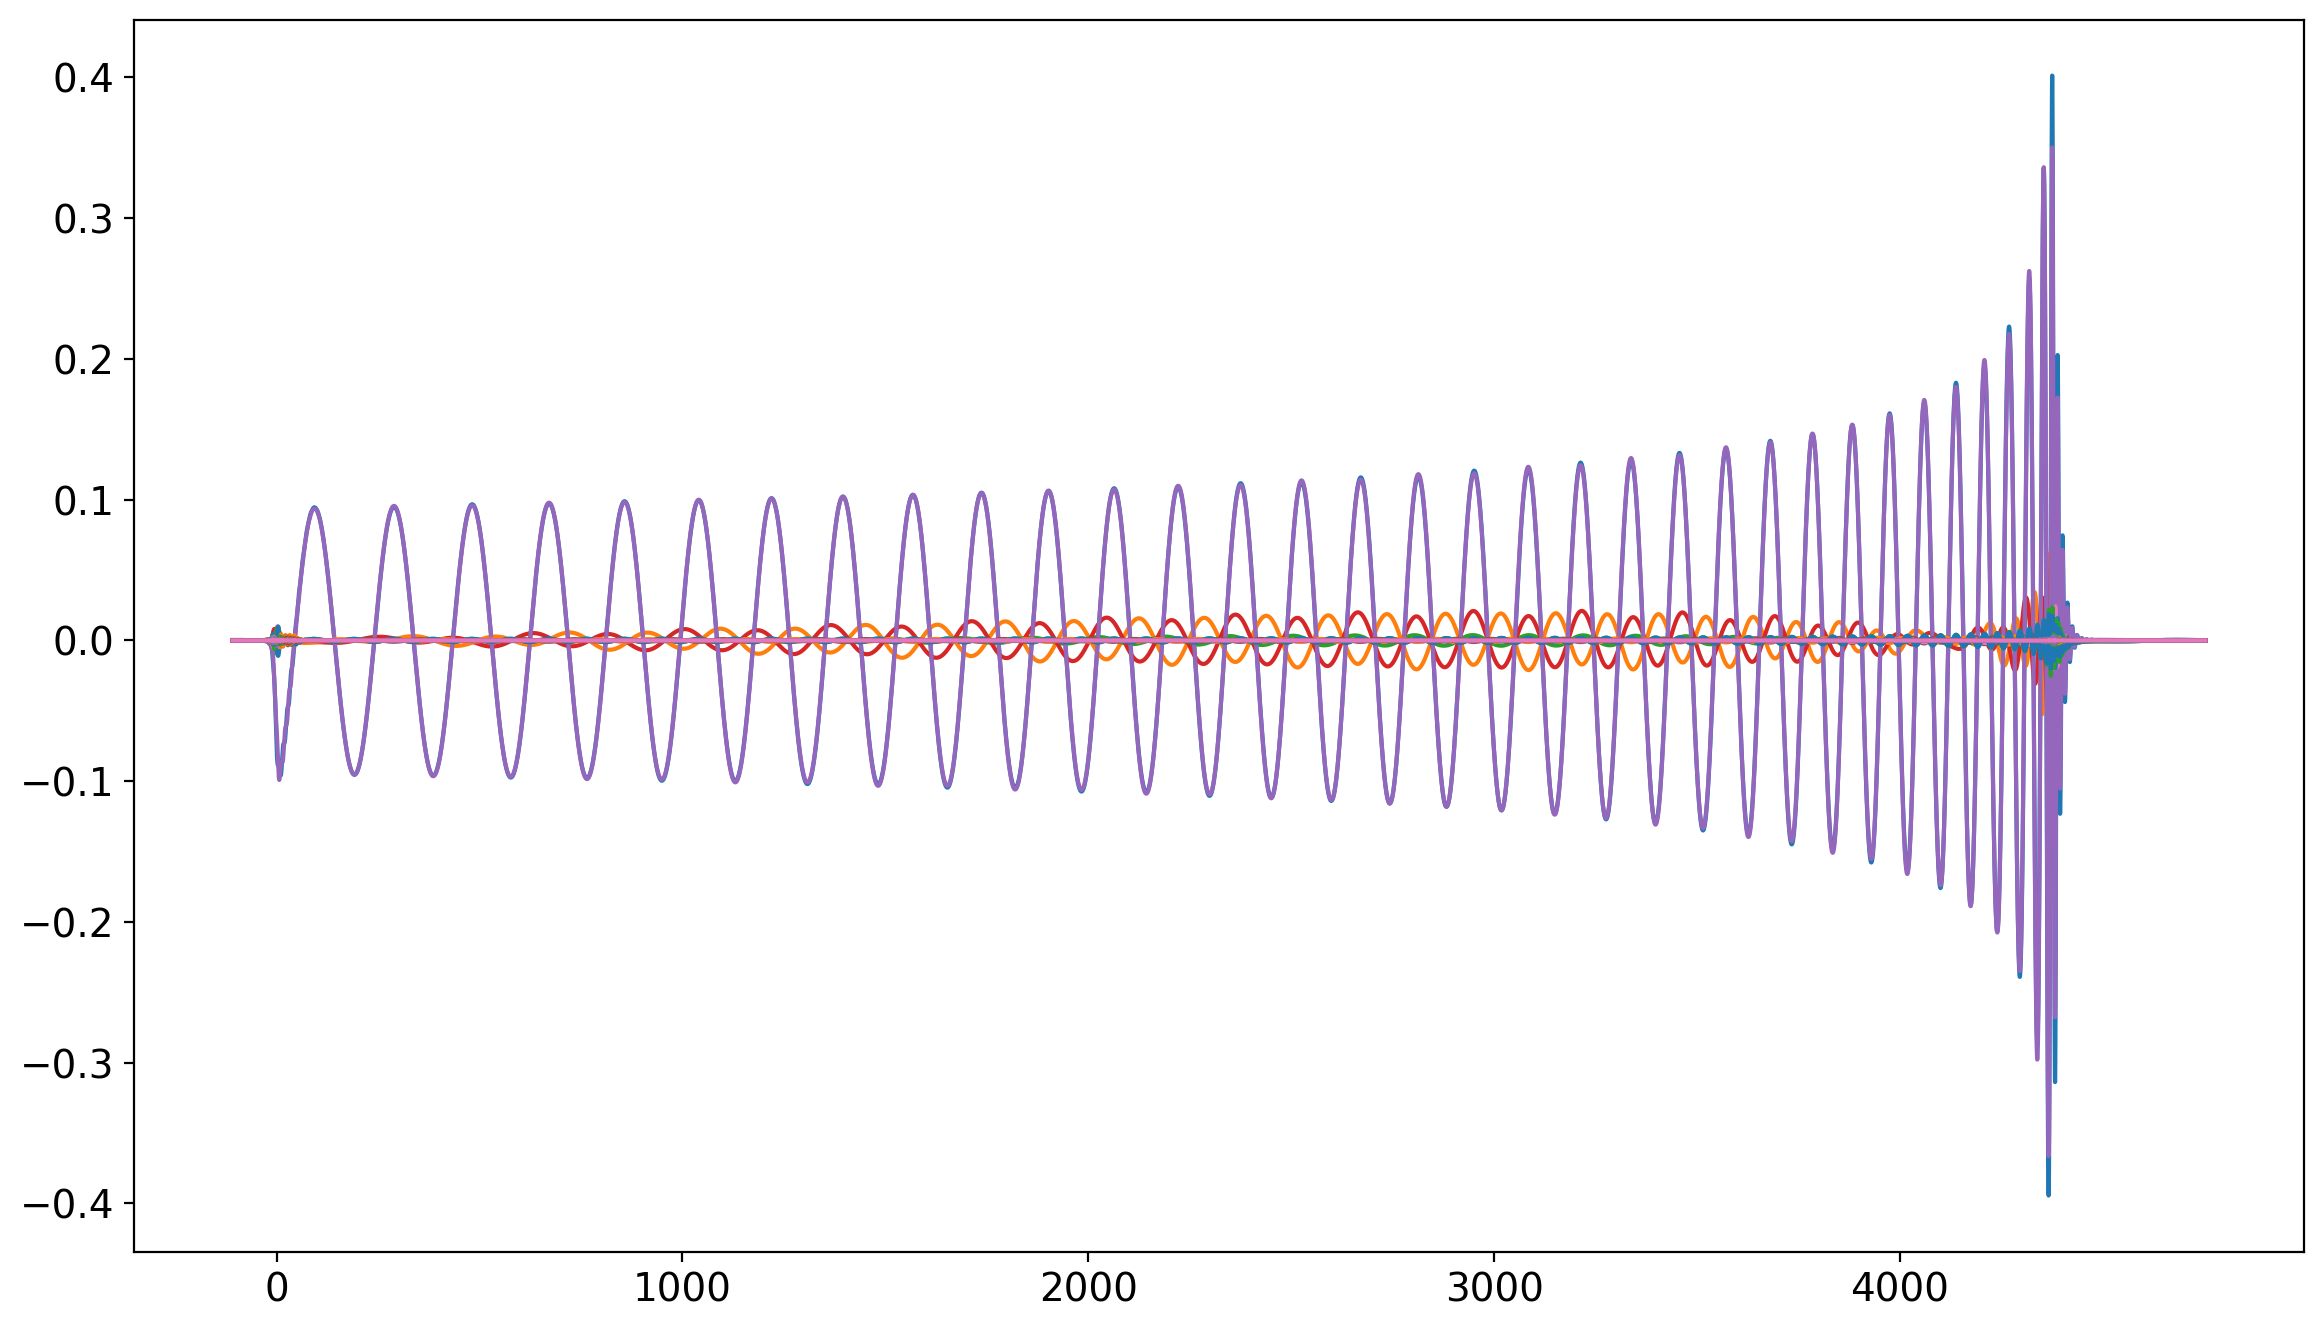

In [1]:
import matplotlib.pyplot as plt
import sxs

waveform = sxs.load("SXS:BBH:0123/Lev/rhOverM", extrapolation_order=2)
plt.plot(waveform.t, waveform.data.real);

(If this failed for you, it's probably because you don't already have the data, and you haven't set up any sensible defaults.  See below for advice on that.)

This example loads the data into the `waveform` object.  Then, we extract the time data with `waveform.t`, and the real part of the complex data with `waveform.data.real`.  We will get into much more detail about this in the following notebooks.

# Configuration and caching

Downloading data files every time you load them will very quickly become boring — especially with the old inefficient monolithic files.  You'll probably want to set up caching by default.  

To start with, this package will try to store configuration settings somewhere.  Find where that is with this:

In [2]:
sxs.sxs_directory("config")  # Probably returns some path in your home directory

PosixPath('/Users/boyle/.sxs')

Now, let's try to write our sensible defaults to the config file:

In [3]:
sxs.write_config(download=True, cache=True)

You can check that this worked by reading your config file:

In [4]:
sxs.read_config()

{'download': True, 'cache': True}

You can also find the directory used to cache the data:

In [5]:
sxs.sxs_directory("cache")  # Probably returns some path in your home directory

PosixPath('/Users/boyle/.sxs/cache')

Now that that's all set up, you should be able to use the `sxs` package efficiently.

# The notebooks

It is probably best to go through these notebooks in order:

  1. [Introduction to metadata](01-Metadata.ipynb)
  2. [Introduction to the catalog](02-Catalog.ipynb)
  3. [Introduction to horizons](03-Horizons.ipynb)
  4. [Introduction to waveforms](04-Waveforms.ipynb)